In [1]:
# Install the required libraries
#!pip install prophet

In [2]:
# Dependencies
# NOTE: We might not use all of these. I just improrted everything I can think of for now. We'll delete the ones we don't need later
import requests
import time
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import json
import os.path

In [47]:
#Read data into the notebook
linkedin_postings_df = pd.read_csv('./data_sets/postings.csv').dropna()
machine_learning_jobs_df = pd.read_json('./data_sets/job_data.json', lines=True)

In [48]:
linkedin_postings_df['job_skills'] = linkedin_postings_df['job_skills'].apply(lambda item: item.lower().split(', '))
# Get all job listings with an AI related keyword  listed as a skill requirement 
terms_to_match = ['machine learning', 'artificial intelligence', 'pytorch', 'langchain', 'ai', 'tensorflow', 'deep learning', 'neural network', 
               'natural language processing', 'nlp', 'computer vision', 'large language models', 'chatbot', 'ai chatbot', 'llm', 'llms', 'generative ai', 'generative models', 'genai', 'bert', 'spacy', 'nltk', 'keras', 'gpt', 'chatgpt', 'prompt development', 'prompt engineering']
linkedin_postings_df['job_skills'] = linkedin_postings_df['job_skills']
linkedin_postings_df['has_ai'] = linkedin_postings_df['job_skills'].apply(
    lambda skills: any(term in skills for term in terms_to_match)
)
#Separate the groupings into two new dataframes
ai_roles = linkedin_postings_df.loc[linkedin_postings_df['has_ai'] == True]
# Job listings without AI keywords will be classified as "general" roles
general_roles = linkedin_postings_df.loc[linkedin_postings_df['has_ai'] == False] 

***Introduction*** 
The goal of this exploratory data analysis is to characterize and investigate the growth of machine learning as a job skill. We are interested in looking at this topic along a number angles. TBC....

QUESTION Geography 

In [5]:
# Insert Question 1 analysis and visualizations here. Insert new cells if necessary 

Q1 Summary \[INSERT SUMMARY HERE] ... write a little about what the findings above seem to indicate about question 1

Question 2 Relative proportions ML to not-ML

In [6]:
# Insert question 2 analysis etc here. Insert new cells if necessary

Q2 Summary \[INSERT SUMMARY HERE]

Question Job Skills

In [7]:
# etc 

Q3 Summary \[INSERT SUMMARY HERE]

Question Seniority/Job level

In [8]:
# create dataframe and display country, job type, and job level 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./data_sets/postings.csv")
job_info = df[["search_country", "job_location", "job level", "job_type"]]
print(job_info.head(10))

  search_country      job_location   job level job_type
0  United States  West Chester, OH   Associate   Remote
1  United States    Cincinnati, OH   Associate   Remote
2  United States   Chattanooga, TN  Mid senior   Onsite
3  United States   Chattanooga, TN  Mid senior   Onsite
4  United States   Chattanooga, TN  Mid senior   Onsite
5  United States   Chattanooga, TN  Mid senior   Onsite
6  United States   Chattanooga, TN  Mid senior   Onsite
7  United States   Chattanooga, TN  Mid senior   Onsite
8  United States    Las Cruces, NM  Mid senior   Onsite
9  United States    Las Cruces, NM  Mid senior   Onsite


In [10]:
# Describe the dataframe 
df.drop(columns = ["job_link"]).describe()

,job_title,company,job_location,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills
count,9380,9380,9380,9380,9380,9380,9380,9380,9376,9367
unique,3870,3373,1618,1,709,4,2,3,7763,9340
top,Senior Software Engineer,Jobs for Humanity,"San Francisco, CA",2023-12-25,Novato,United States,Mid senior,Onsite,"For more than 50 years, NISC has worked to dev...","Java, Python, SQL, Node, Go, Scala, AWS, GCP, ..."
freq,794,681,133,9380,92,7335,8101,4316,62,3


In [11]:
# Summarize the dataframe 
df.drop(columns = ["job_link"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   job_title       9380 non-null   object
 1   company         9380 non-null   object
 2   job_location    9380 non-null   object
 3   first_seen      9380 non-null   object
 4   search_city     9380 non-null   object
 5   search_country  9380 non-null   object
 6   job level       9380 non-null   object
 7   job_type        9380 non-null   object
 8   job_summary     9376 non-null   object
 9   job_skills      9367 non-null   object
dtypes: object(10)
memory usage: 732.9+ KB


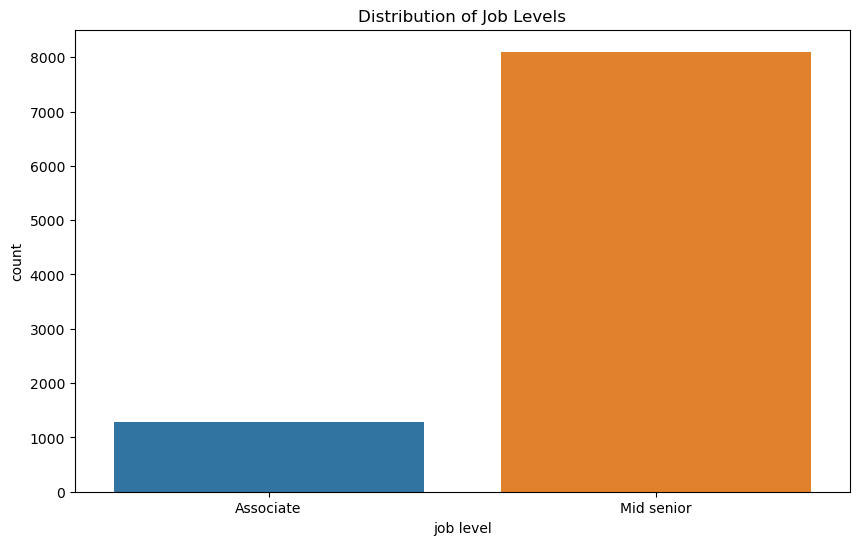

In [12]:
# Visualize job levels in aggregate 
import seaborn as sns 
plt.figure(figsize = (10, 6))
sns.countplot(x="job level", data = df)
plt.xlabel("job level")
plt.ylabel("count")
plt.title("Distribution of Job Levels")
plt.show()

Distribution of job levels skew heavily to mid senior jobs at ~8:1 rate with the majority of postings requiring mid to senior level skillsets

In [19]:
# Group by job type and job level,then count the occurrences 
grouped = df.groupby(["job_type", "job level"]).size().unstack(fill_value=0)

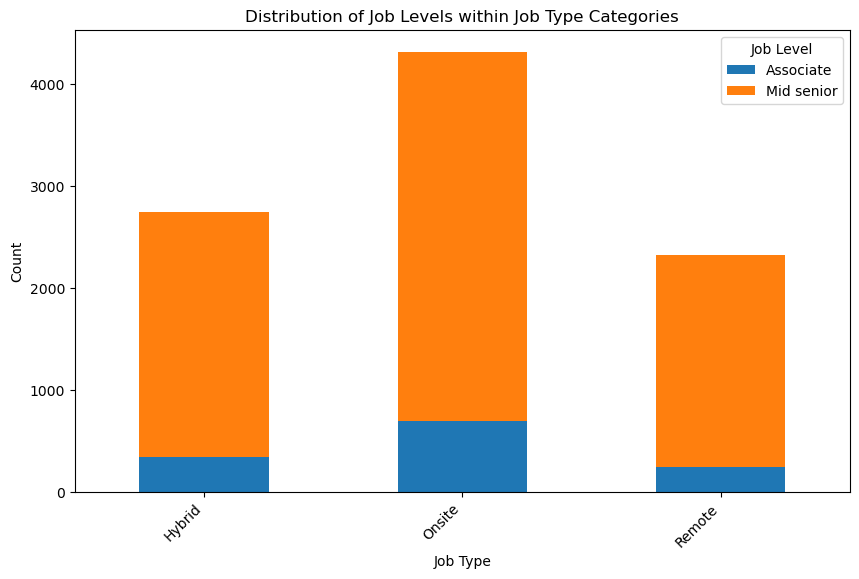

In [20]:
# Plot stacked bar chart for job type and job level 
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Job Levels within Job Type Categories")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Job Level")
plt.show()

Postings for both associate and mid-senior level roles are listed predominantly as 'onsite' but both job levels offer flexibilty with >40% of total associate roles and >50% of mid-senior roles falling in the Remote-Hybrid category.

In [21]:
# Count the occurrences of job levels within each country 
job_level_counts = df.groupby(["search_country", "job level"]).size().unstack(fill_value=0)

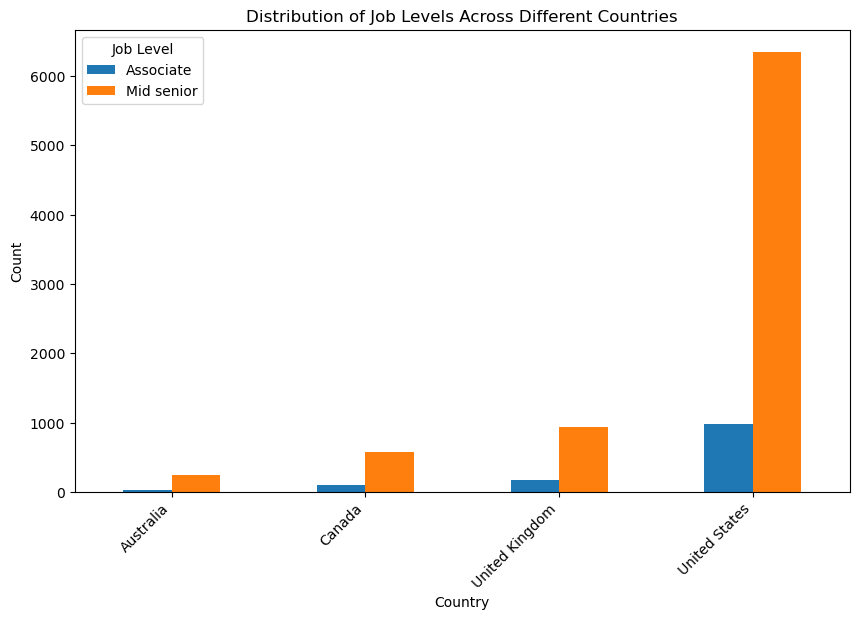

In [22]:
# Plot a bar chart for job level and job types within each country
job_level_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Distribution of Job Levels Across Different Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title= "Job Level")
plt.show()

The preference for mid-senior level candidates runs across all four countries in the the dataset. The samples for non-U.S. countries, while not representative, highlight their willingness to consider U.S. candidates for AI tech roles across borders.

In [23]:
# Split the 'job_location' column into city and state and extract state
df['state'] = df['job_location'].str.split(', ').str[-1]

C:\Users\Peta-\AppData\Local\Temp\ipykernel_5884\2366752360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remote_df['count'] = 1


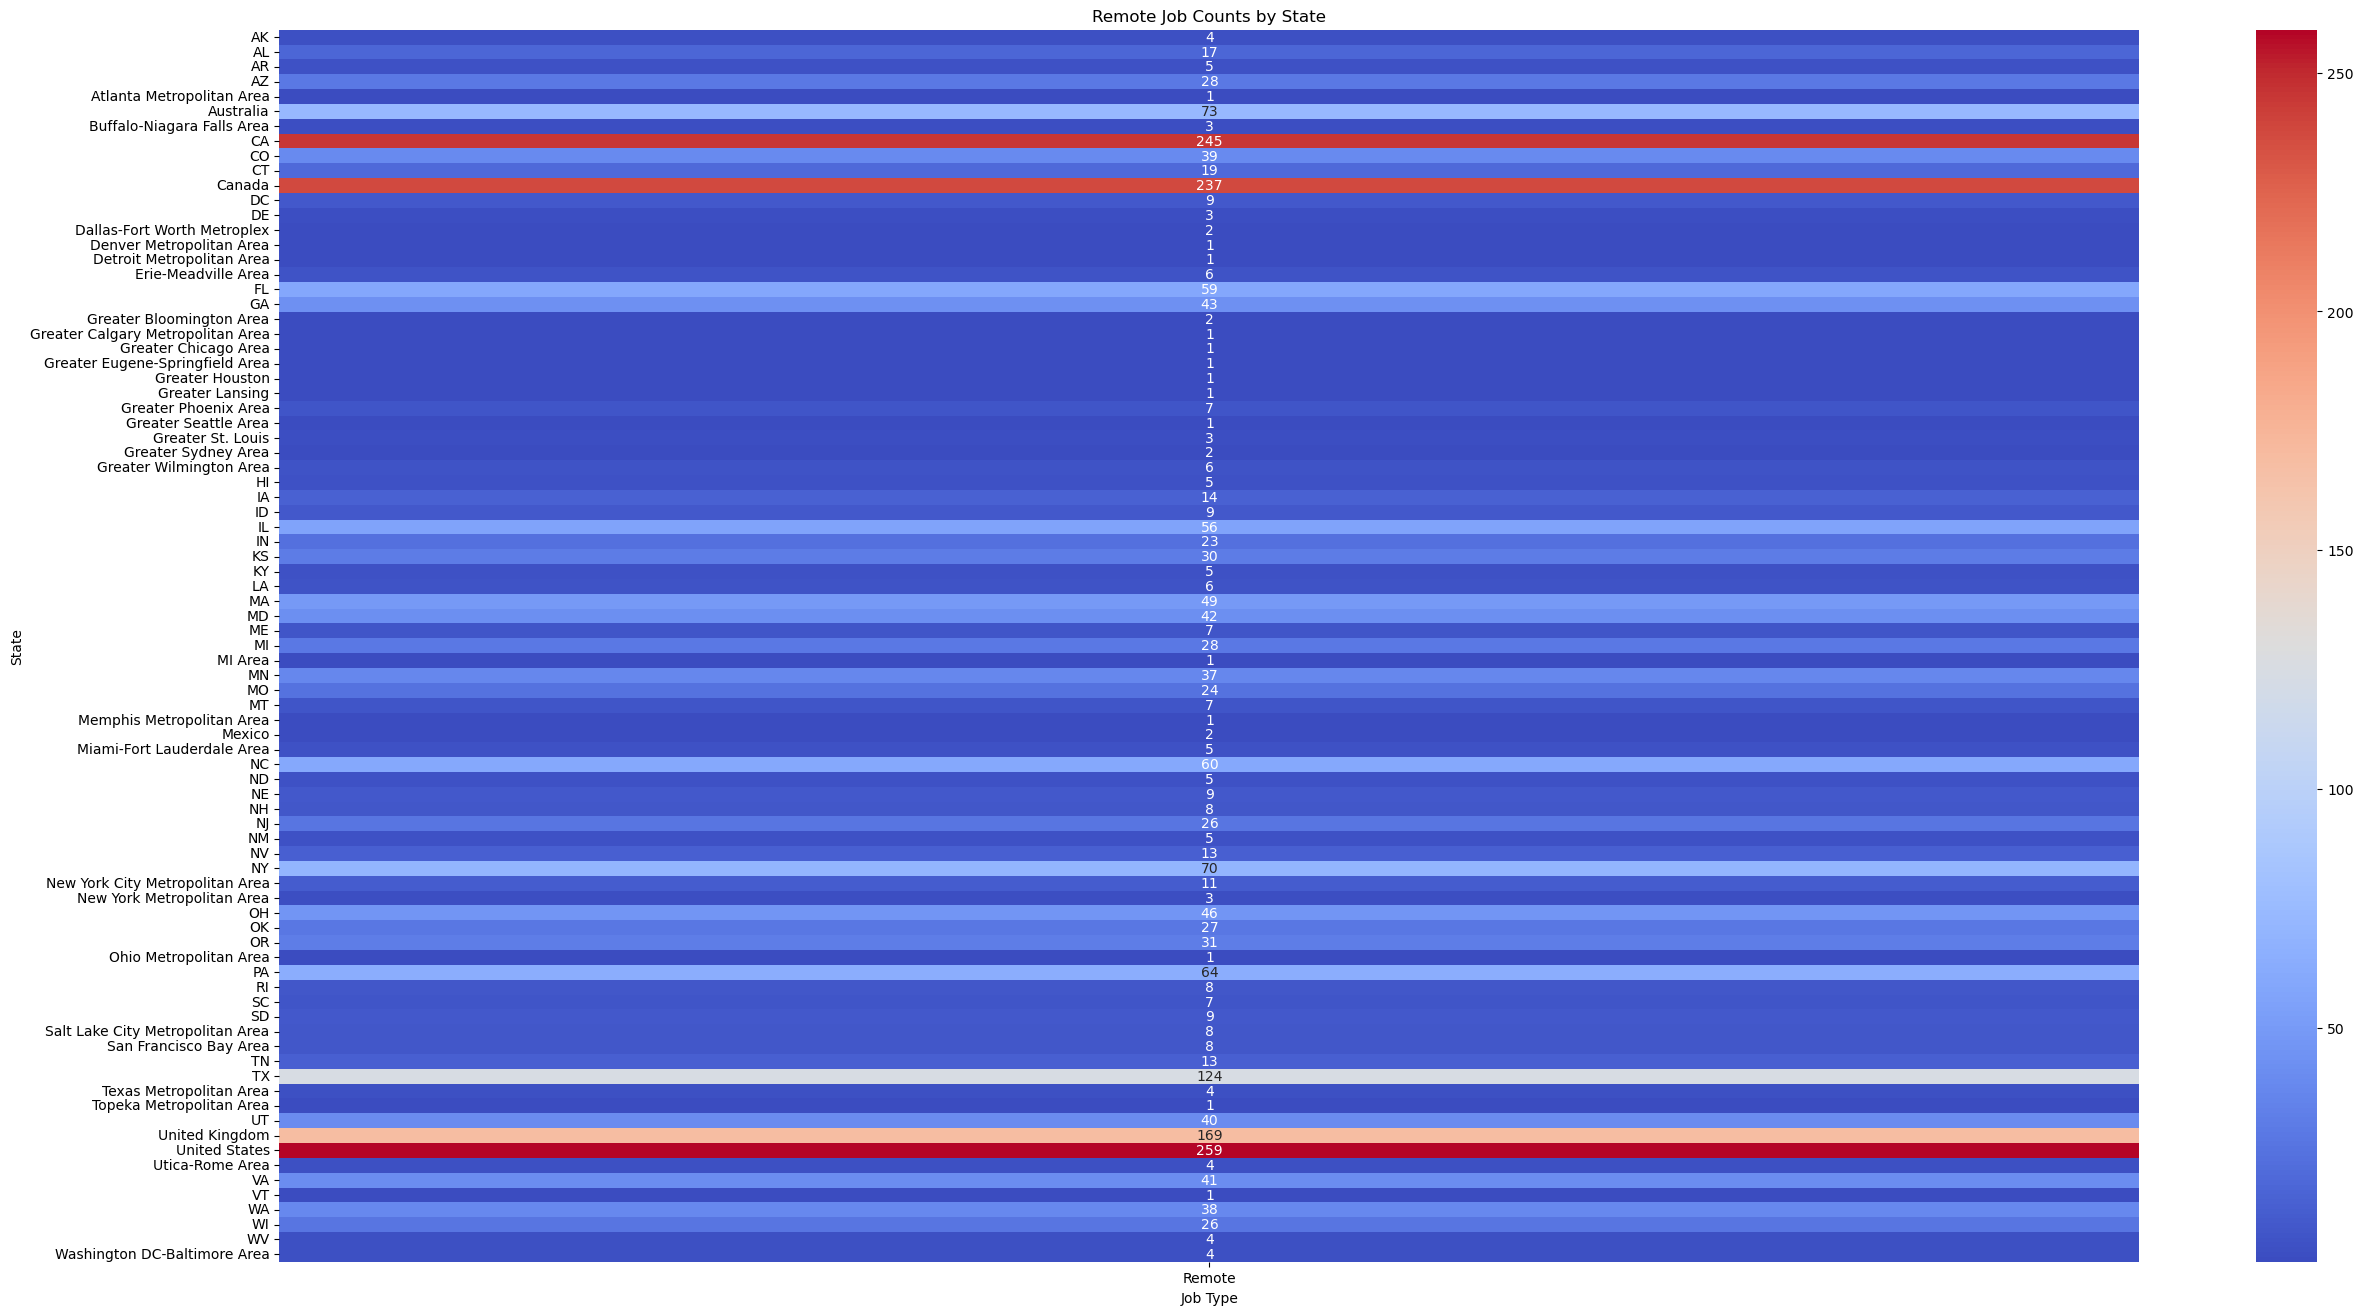

In [24]:
# Create heatmap showing concentration of remote jobs by state
remote_df = df[df['job_type'] == 'Remote']
remote_df['count'] = 1
import seaborn as sns 
import matplotlib.pyplot as plt
pivot_df = remote_df.pivot_table(index='state', columns='job_type', values='count', aggfunc='sum') 
plt.figure(figsize=(30, 16))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='g')
plt.title('Remote Job Counts by State') 
plt.xlabel('Job Type') 
plt.ylabel('State') 
plt.show()

C:\Users\Peta-\AppData\Local\Temp\ipykernel_5884\1374009382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remote_df['count'] = 1


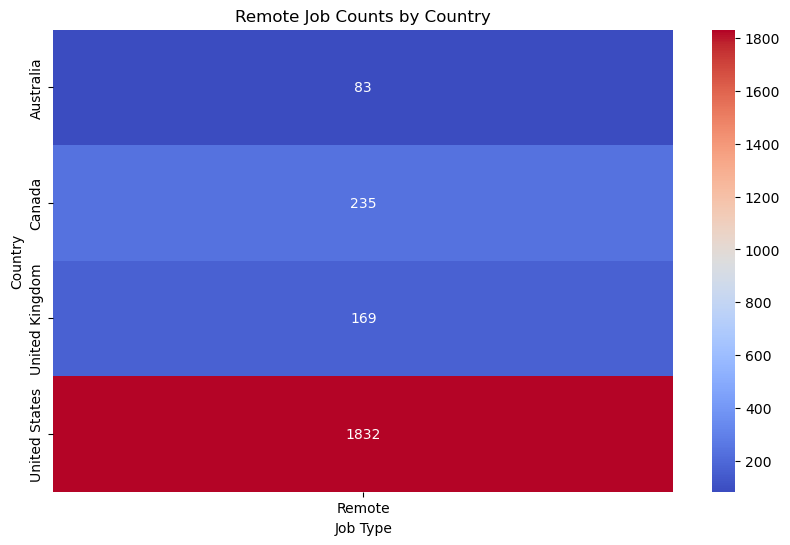

In [25]:
# Create heatmap showing concentration of onsite, hybrid, and remote jobs by country
remote_df = df[df['job_type'] == 'Remote']
remote_df['count'] = 1
import seaborn as sns 
import matplotlib.pyplot as plt
pivot_df = remote_df.pivot_table(index='search_country', columns='job_type', values='count', aggfunc='sum') 
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='g')
plt.title('Remote Job Counts by Country') 
plt.xlabel('Job Type') 
plt.ylabel('Country') 
plt.show()

In [ ]:
# Commentary: 

In [26]:
# Filter data for onsite, hybrid, and remote jobs
onsite_df = df[df['job_type'] == 'Onsite']
hybrid_df = df[df['job_type'] == 'Hybrid']
remote_df = df[df['job_type'] == 'Remote']

In [32]:
# Add count column for each job type
onsite_df['count'] = 1
hybrid_df['count'] = 1
remote_df['count'] = 1

C:\Users\Peta-\AppData\Local\Temp\ipykernel_5884\3012239579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onsite_df['count'] = 1
C:\Users\Peta-\AppData\Local\Temp\ipykernel_5884\3012239579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hybrid_df['count'] = 1
C:\Users\Peta-\AppData\Local\Temp\ipykernel_5884\3012239579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [29]:
# Pivot tables for each job type
pivot_onsite = onsite_df.pivot_table(index='search_country', values='count', aggfunc='sum', fill_value=0)
pivot_hybrid = hybrid_df.pivot_table(index='search_country', values='count', aggfunc='sum', fill_value=0)
pivot_remote = remote_df.pivot_table(index='search_country', values='count', aggfunc='sum', fill_value=0)

In [30]:
# Concatenate pivot tables for all job types
concatenated_df = pd.concat([pivot_onsite, pivot_hybrid, pivot_remote], axis=1)
concatenated_df.columns = ['Onsite', 'Hybrid', 'Remote']

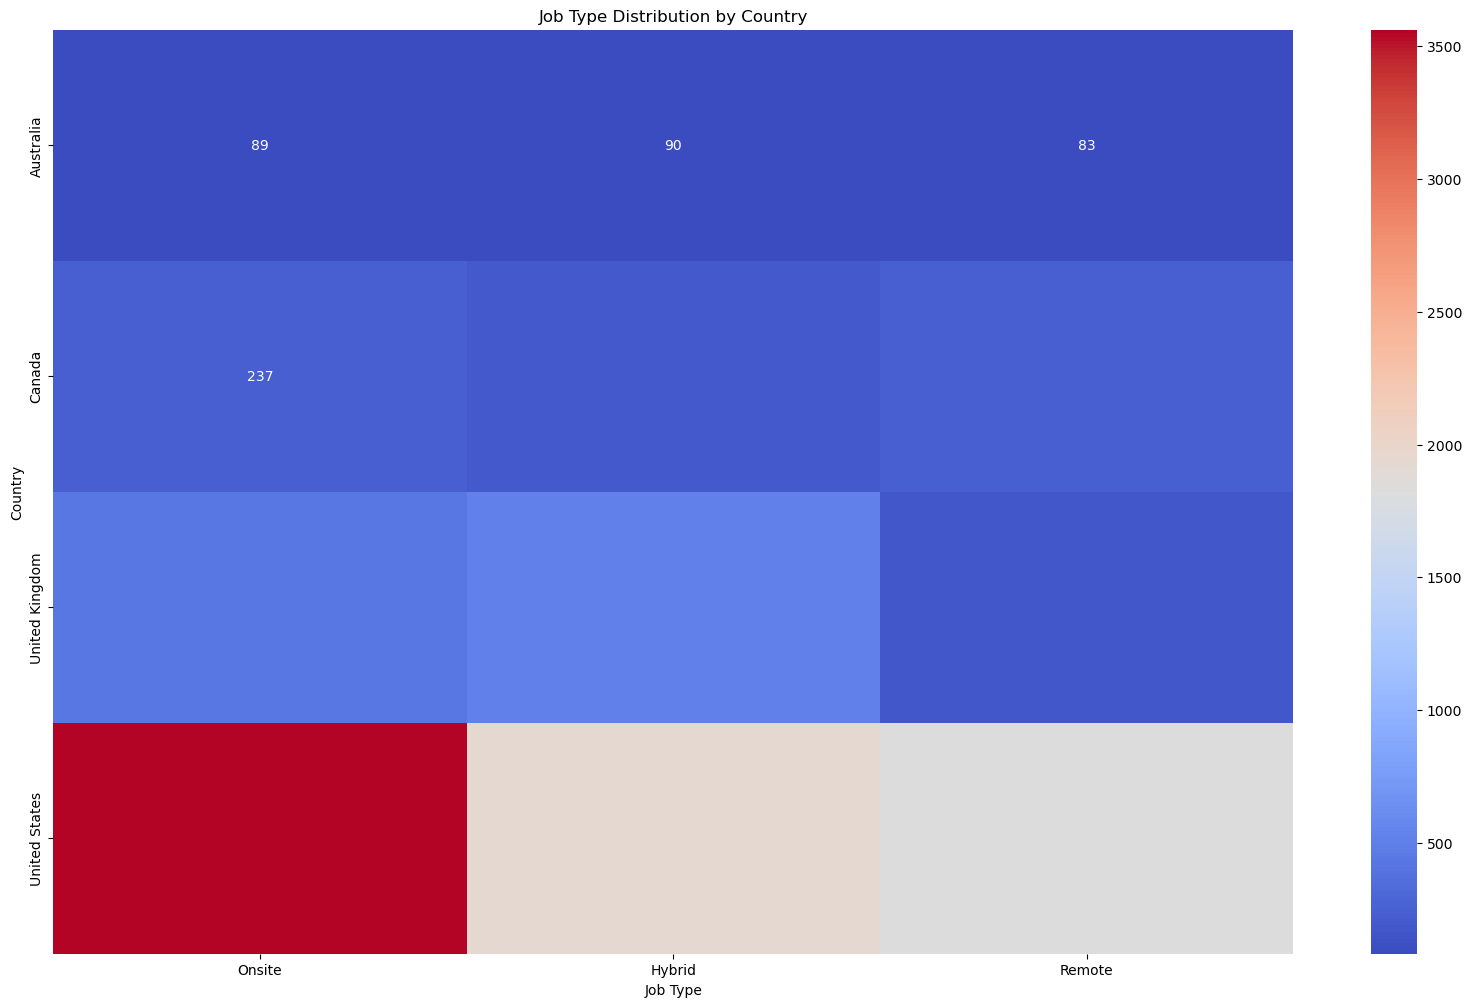

In [31]:
# Plotting heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(concatenated_df, annot=True, cmap='coolwarm', fmt='g')
plt.title('Job Type Distribution by Country') 
plt.xlabel('Job Type') 
plt.ylabel('Country') 
plt.show()

For United States, Canada, and the UK, the onsite job type is their largest category; Australia on the other hand has the their largest cateogory of postings as hybrid.

In [55]:
# List the top 5 skills by job level 
import pandas as pd
from collections import Counter

# Define the example data
data = {
    'job_level': ['Associate', 'Mid', 'Senior', 'Associate', 'Senior', 'Mid'],
    'job_skills': ['machine learning, python, sql', 'management, sales', 'artificial intelligence, deep learning', 
                   'python, tensorflow, keras', 'deep learning, neural network, keras', 'pytorch, tensorflow, ai']
}

# Create a DataFrame from the data
linkedin_postings_df = pd.DataFrame(data)

# Convert job skills to lowercase and split into lists
linkedin_postings_df['job_skills'] = linkedin_postings_df['job_skills'].apply(lambda item: item.lower().split(', '))

# List of AI-related keywords
terms_to_match = [
    'machine learning', 'artificial intelligence', 'pytorch', 'langchain', 'ai', 'tensorflow', 'deep learning',
    'neural network', 'natural language processing', 'nlp', 'computer vision', 'large language models', 'chatbot',
    'ai chatbot', 'llm', 'llms', 'generative ai', 'generative models', 'genai', 'bert', 'spacy', 'nltk', 'keras',
    'gpt', 'chatgpt', 'prompt development', 'prompt engineering'
]

# Check if job skills contain any AI-related keywords
linkedin_postings_df['has_ai'] = linkedin_postings_df['job_skills'].apply(
    lambda skills: any(term in skills for term in terms_to_match)
)

# Separate AI roles
ai_roles = linkedin_postings_df[linkedin_postings_df['has_ai']]

# Function to count skills for a given job level
def count_skills(df, job_level):
    skills = df[df['job_level'] == job_level]['job_skills']
    all_skills = [skill for sublist in skills for skill in sublist]
    return Counter(all_skills)

# Count skills for associate, mid, and senior levels
associate_skills = count_skills(ai_roles, 'Associate')
mid_skills = count_skills(ai_roles, 'Mid')
senior_skills = count_skills(ai_roles, 'Senior')

# Display the most common skills for each level
print("Most common skills for Associate level jobs:")
print(associate_skills.most_common(3))

print("\nMost common skills for Mid level jobs:")
print(mid_skills.most_common(3))

print("\nMost common skills for Senior level jobs:")
print(senior_skills.most_common(3))

Most common skills for Associate level jobs:
[('python', 2), ('machine learning', 1), ('sql', 1)]

Most common skills for Mid level jobs:
[('pytorch', 1), ('tensorflow', 1), ('ai', 1)]

Most common skills for Senior level jobs:
[('deep learning', 2), ('artificial intelligence', 1), ('neural network', 1)]


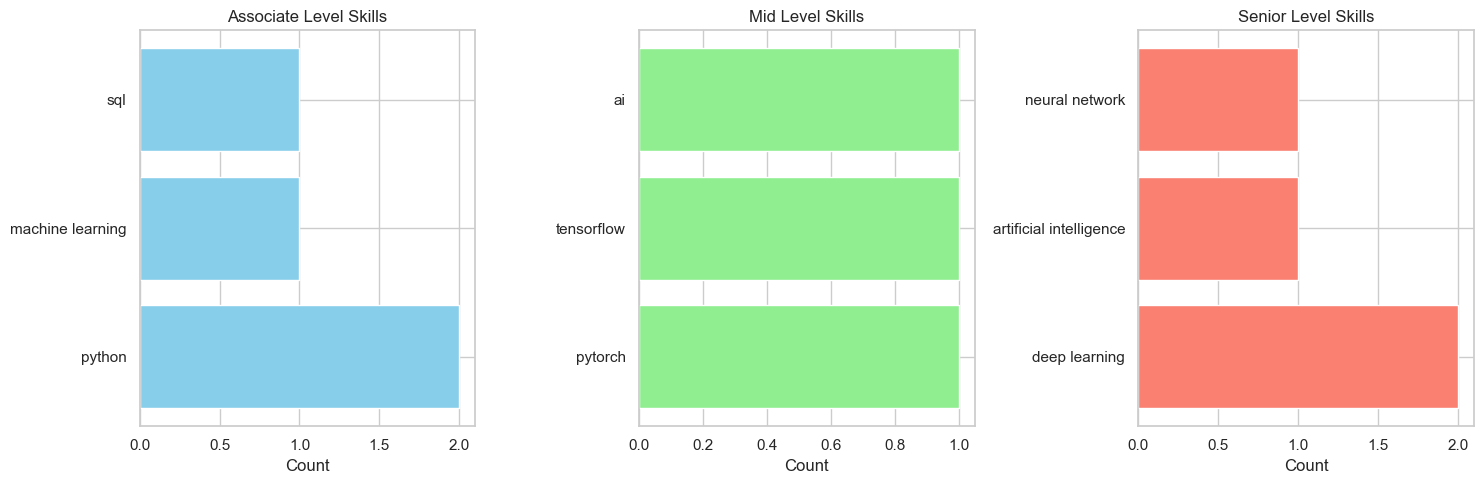

In [57]:
# Create bar chart that displays the top 3 skills by job level 
import matplotlib.pyplot as plt

# Skills data
associate_skills = [('python', 2), ('machine learning', 1), ('sql', 1)]
mid_level_skills = [('pytorch', 1), ('tensorflow', 1), ('ai', 1)]
senior_skills = [('deep learning', 2), ('artificial intelligence', 1), ('neural network', 1)]

# Extracting skills and counts for each level
associate_labels, associate_counts = zip(*associate_skills)
mid_level_labels, mid_level_counts = zip(*mid_level_skills)
senior_labels, senior_counts = zip(*senior_skills)

# Plotting the bar charts
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.barh(associate_labels, associate_counts, color='skyblue')
plt.xlabel('Count')
plt.title('Associate Level Skills')

plt.subplot(1, 3, 2)
plt.barh(mid_level_labels, mid_level_counts, color='lightgreen')
plt.xlabel('Count')
plt.title('Mid Level Skills')

plt.subplot(1, 3, 3)
plt.barh(senior_labels, senior_counts, color='salmon')
plt.xlabel('Count')
plt.title('Senior Level Skills')

plt.tight_layout()
plt.show()

Python as a programming language is listed most frequently as a requirement for entry level AI related postings, but mid-senior level roles ask for an expanded and advanced skillset that includes skills ties to deep learning amd neural network expertise.

Question 5 Industry demand 